# US BABY NAMES

## Keywords:
String formatting, concatenation of dataframes, ignore_index, aggregation through groupby and pivot_table,

In [144]:
%reset -f
import pandas as pd
import numpy as np

In [145]:
# Start loading names

names1880 = pd.read_csv('names/yob1880.txt', names = ['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [146]:
# Group the names by sex

names1880.groupby('sex').head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
942,John,M,9655
943,William,M,9532
944,James,M,5927
945,Charles,M,5348
946,George,M,5126


In [147]:
# Put together the data from all the files into a single DataFrame
years = range(1880,2011)

pieces = []
columns = ['name','sex','births']

for i in years:
    path = 'names/yob{}.txt'.format(i)
    frame = pd.read_csv(path, names = columns)
    frame['year'] = i
    pieces.append(frame)
    
    
# Now Concatenate all the dataframes together
names = pd.concat(pieces, ignore_index=True)

names


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692251,Zymaire,M,5,2010
1692252,Zyonne,M,5,2010
1692253,Zyquarius,M,5,2010
1692254,Zyran,M,5,2010


In [148]:
total_births = pd.pivot_table(names, values = 'births', index='year', columns='sex', aggfunc=np.sum)
total_births.tail()

sex,F,M
year,,
2006,1900092,2054077
2007,1921385,2074138
2008,1889483,2038689
2009,1835518,1981950
2010,1775857,1917024


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

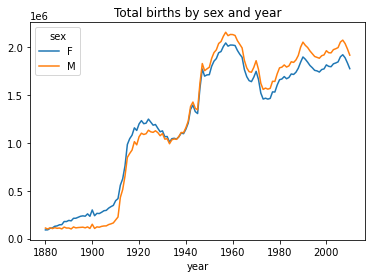

In [149]:
total_births.plot(title='Total births by sex and year')

In [150]:
def add_prop(group):
    # Integer division floors    
    births = group['births'].astype(float)
    
    group['prop'] = births / births.sum()    
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names



,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692251,Zymaire,M,5,2010,0.000003
1692252,Zyonne,M,5,2010,0.000003
1692253,Zyquarius,M,5,2010,0.000003
1692254,Zyran,M,5,2010,0.000003


In [151]:
# Top 1000 names for each year

def get_top1000(group):    
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])

top1000 = grouped.apply(get_top1000)

# If you prefer a do-it-yourself approach, you could also do
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [152]:
# Splitting the data and analysing trends

boys = top1000[top1000['sex']=='M']

girls = top1000[top1000['sex']=='F']

In [153]:
total_births = pd.pivot_table(names, values = 'births', index='year', columns='name', aggfunc=np.sum)

total_births

name,Aaban,Aabid,Aabriella,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyrus,Zysean,Zyshaun,Zyshawn,Zyshon,Zyshonne,Zytavious,Zyvion,Zyyanna,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,NaN,NaN,9.0,NaN,14.0,56.0,NaN,5.0,NaN,...,NaN,NaN,5.0,5.0,NaN,NaN,7.0,NaN,NaN,NaN
2007,5.0,NaN,NaN,8.0,8.0,13.0,157.0,NaN,NaN,NaN,...,NaN,NaN,7.0,11.0,NaN,NaN,6.0,NaN,NaN,NaN
2008,NaN,NaN,5.0,6.0,22.0,13.0,957.0,NaN,NaN,NaN,...,9.0,NaN,6.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

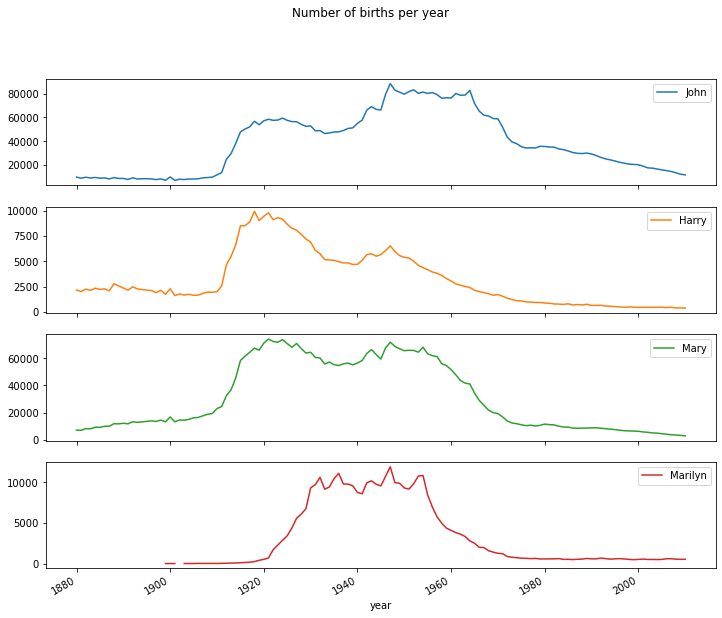

In [154]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

In [155]:
 table = pd.pivot_table(top1000, values = 'prop', index='year', columns='sex', aggfunc=np.sum)

table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753047,0.860292
2007,0.745850,0.855081
2008,0.740811,0.849970


<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

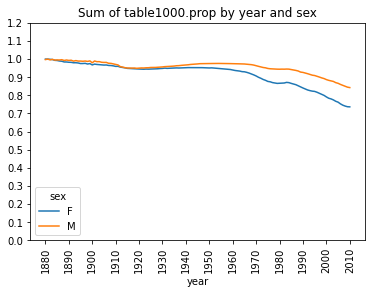

In [156]:
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10),rot=90)

In [157]:
# Finding the number of popular names up to 50%

df = boys[boys.year == 2010]

df

,name,sex,births,year,prop
260877,Jacob,M,22136,2010,0.011547
260878,Ethan,M,18004,2010,0.009392
260879,Michael,M,17359,2010,0.009055
260880,Jayden,M,17185,2010,0.008964
260881,William,M,17054,2010,0.008896
...,...,...,...,...,...
261872,Bailey,M,196,2010,0.000102
261873,Destin,M,196,2010,0.000102
261874,Eliezer,M,196,2010,0.000102
261875,Enoch,M,196,2010,0.000102


In [158]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

prop_cumsum[:10]


# Find the place where insertion of 0.5 would keep the list in a sorted order
prop_cumsum.searchsorted(0.5)

116

In [159]:
#  By con-trast, in 1900 this number was much smaller:

# It should now be fairly straightforward to apply this operation to each year/sex com-bination; 
# groupby those fields and apply a function returning the count for each group:

def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

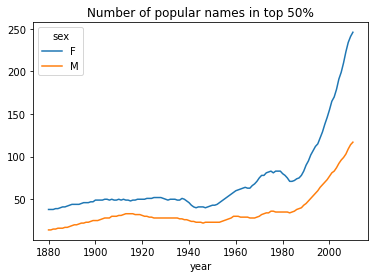

In [160]:
diversity.plot(title="Number of popular names in top 50%")

In [161]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692251,Zymaire,M,5,2010,0.000003
1692252,Zyonne,M,5,2010,0.000003
1692253,Zyquarius,M,5,2010,0.000003
1692254,Zyran,M,5,2010,0.000003


# Last Letter revolution

In [162]:
# Get the last letters of the names

get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
#last_letters.name = 'last_letter'
names['last_letters'] = last_letters
table= pd.pivot_table(names, values = 'births', index='last_letters', columns=['sex','year'], aggfunc=np.sum)

table

sex                 F                                                        \
year             1880     1881     1882     1883     1884     1885     1886   
last_letters                                                                  
a             31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                 NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d               609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e             33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                 7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h              4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i                61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k                13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l              2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m                58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n              3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o                30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r               481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s              1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t              2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u               380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                 NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                 NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y             10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z               106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                      ...         M                      \
year             1887     1888     1889  ...      2001      2002      2003   
last_letters                             ...                                 
a             48942.0  59440.0  58631.0  ...   39168.0   38855.0   37870.0   
b                 NaN      NaN      NaN  ...   51001.0   49334.0   48121.0   
c                 NaN      NaN      NaN  ...   27133.0   27265.0   27726.0   
d              1027.0   1298.0   1374.0  ...   60916.0   55925.0   53460.0   
e             54353.0  66748.0  66662.0  ...  145507.0  144785.0  144925.0   
f                 NaN      NaN      NaN  ...    1758.0    1818.0    1820.0   
g                25.0     44.0     28.0  ...    2155.0    2085.0    2014.0   
h              7141.0   8630.0   8825.0  ...   86075.0   88181.0   88350.0   
i               105.0    141.0    134.0  ...   21034.0   23659.0   26057.0   
j                 NaN      NaN      NaN  ...    1072.0    1088.0    1208.0   
k                19.0     21.0     22.0  ...   42501.0   42061.0   42321.0   
l              6174.0   7900.0   8395.0  ...  153822.0  153668.0  154067.0   
m                90.0    123.0    137.0  ...   42016.0   42716.0   42824.0   
n              5512.0   6832.0   7103.0  ...  616566.0  630825.0  664080.0   
o                97.0    134.0    142.0  ...   82192.0   83245.0   85494.0   
p                 NaN      NaN      NaN  ...    3420.0    3164.0    2985.0   
q                 NaN      NaN      NaN  ...     603.0     619.0     586.0   
r               910.0   1207.0   1214.0  ...  165470.0  164951.0  170008.0   
s              2803.0   3581.0   3569.0  ...  143951.0  139775.0  1387

In [163]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [164]:
subtable.head()

sex                  F                            M                    
year              1910      1960      2010     1910      1960      2010
last_letters                                                           
a             108399.0  691274.0  677049.0    977.0    5214.0   28881.0
b                  NaN     694.0     455.0    411.0    3912.0   39290.0
c                  5.0      49.0     957.0    482.0   15457.0   23356.0
d               6751.0    3731.0    2644.0  22113.0  262117.0   44843.0
e             133601.0  435027.0  316855.0  28665.0  178764.0  130296.0

In [165]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022015.0
     2010    1775857.0
M    1910     194210.0
     1960    2132133.0
     2010    1917024.0
dtype: float64

In [166]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop


sex                  F                             M                    
year              1910      1960      2010      1910      1960      2010
last_letters                                                            
a             0.273386  0.341874  0.381252  0.005031  0.002445  0.015066
b                  NaN  0.000343  0.000256  0.002116  0.001835  0.020495
c             0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d             0.017026  0.001845  0.001489  0.113861  0.122937  0.023392
e             0.336947  0.215145  0.178424  0.147598  0.083843  0.067968
f                  NaN  0.000010  0.000055  0.000783  0.004329  0.001206
g             0.000144  0.000157  0.000377  0.002260  0.009488  0.001407
h             0.051530  0.036221  0.075985  0.045564  0.037913  0.051820
i             0.001526  0.039967  0.031697  0.000844  0.000610  0.022670
j                  NaN       NaN  0.000093       NaN       NaN  0.000772
k             0.000121  0.000155  0.000355  0.036579  0.049376  0.018533
l             0.043187  0.033867  0.026390  0.065022  0.104890  0.070457
m             0.001200  0.008613  0.002599  0.058045  0.033834  0.024705
n             0.079237  0.130672  0.140056  0.143386  0.152525  0.362416
o             0.001672  0.002439  0.001247  0.017064  0.012844  0.042564
p             0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                  NaN       NaN  0.000030       NaN       NaN  0.000180
r             0.013395  0.006765  0.018046  0.064471  0.031043  0.087392
s             0.039036  0.012764  0.013337  0.130797  0.102701  0.065159
t             0.027432  0.015198  0.007838  0.072885  0.065645  0.022861
u             0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v                  NaN  0.000060  0.000117  0.000113  0.000036  0.001449
w             0.000020  0.000031  0.001190  0.006323  0.007708  0.016184
x             0.000015  0.000037  0.000729  0.003965  0.001851  0.008599
y             0.110975  0.152556  0.116762  0.077344  0.160983  0.058196
z             0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

<AxesSubplot:title={'center':'Female'}, xlabel='last_letters'>

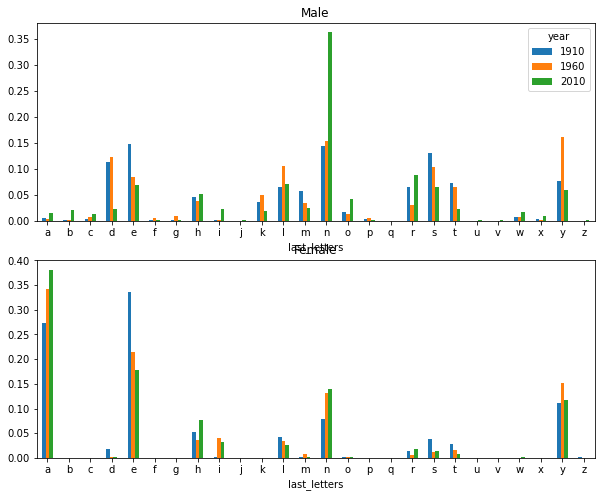

In [167]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)

<AxesSubplot:xlabel='year'>

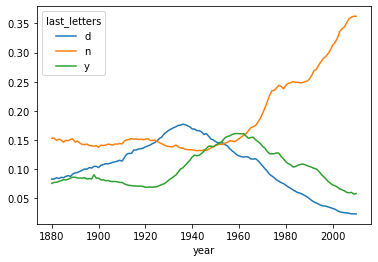

In [168]:
letter_prop = table / table.sum().astype(float)

dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

dny_ts.head()

dny_ts.plot()

In [169]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [170]:
filtered = top1000[top1000['name'].isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35036
Lesli        929
Leslie    370574
Lesly      10072
Name: births, dtype: int64

In [171]:
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
256327,Lesly,F,699,2008,0.000370
258036,Leslie,F,1981,2009,0.001079
258381,Lesly,F,598,2009,0.000326
260075,Leslie,F,1565,2010,0.000881


<AxesSubplot:xlabel='year'>

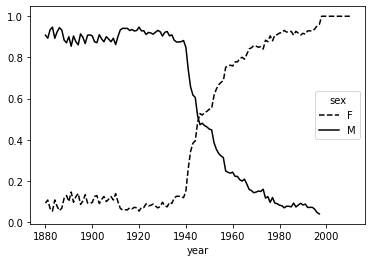

In [172]:
table = pd.pivot_table(filtered, values='births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()
table.plot(style={'M': 'k-', 'F': 'k--'})